In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import LeaveOneOut

In [2]:
file_path = '/content/heart_disease.xlsx'
df = pd.read_excel(file_path)

In [3]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.fillna(numeric_df.mean(), inplace=True)

In [4]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [5]:
X = df.drop('age', axis=1)
y = df['Age in years']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Confusion Matrix:
[[0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]]


In [10]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [11]:
min_samples = y_train.value_counts().min()

In [12]:
n_splits = max(2, min(5, min_samples))

In [13]:
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
cv = LeaveOneOut()
grid_search = GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy') # Pass the StratifiedKFold object to cv parameter
grid_search.fit(X_train, y_train)


GridSearchCV(cv=LeaveOneOut(),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [16]:
best_clf = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


In [19]:
class_names = [str(cls) for cls in best_clf.classes_]

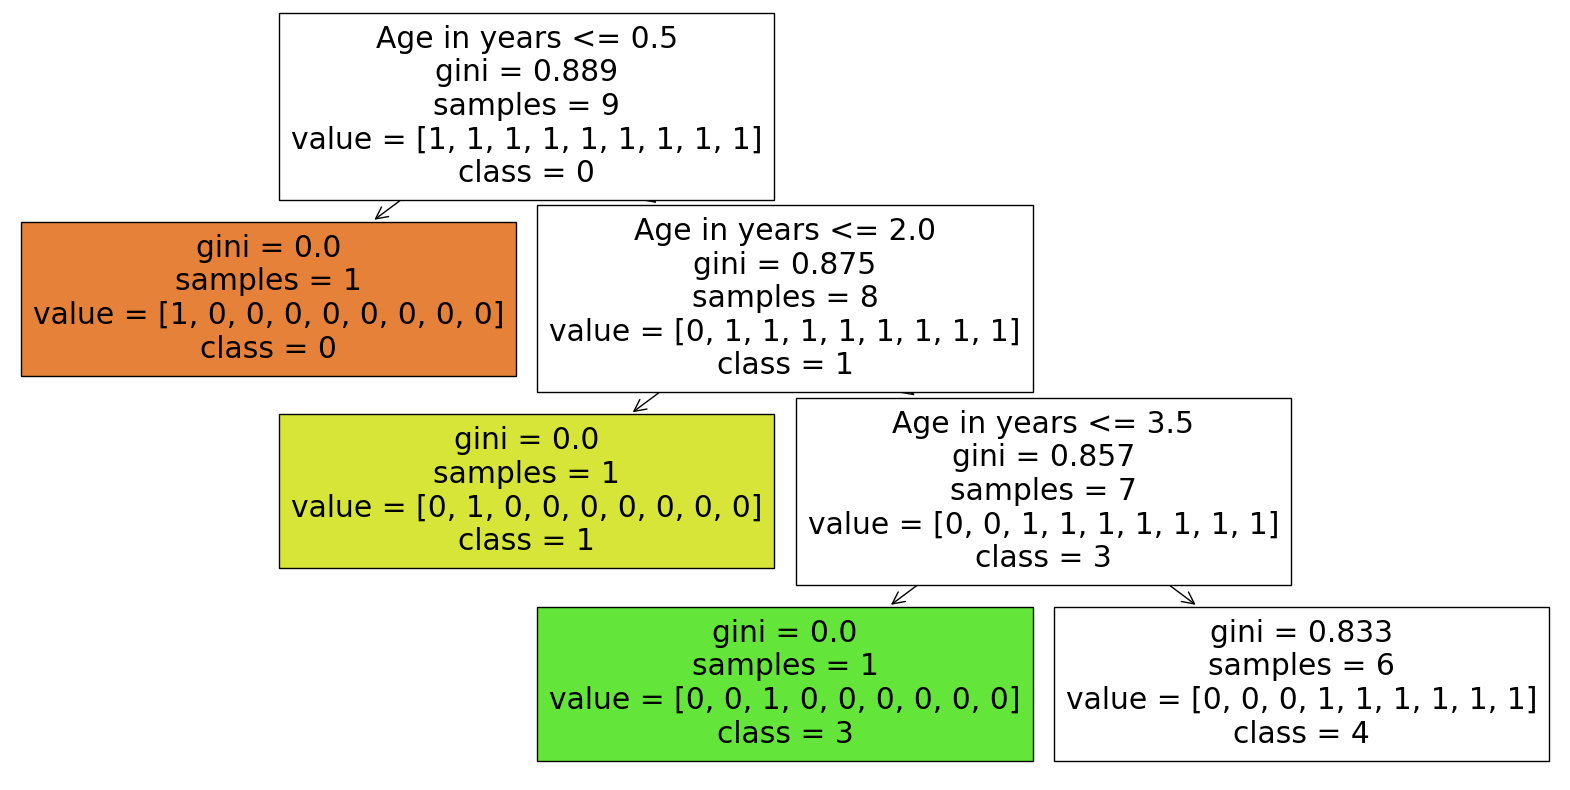

In [20]:
plt.figure(figsize=(20,10))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=class_names)
plt.show()